In [1]:
import numpy as np

In [2]:
ls

All_WT_for_coopfit_tsv.csv  keyed_sats.file.npy
Untitled.ipynb              keylist.file.npy
comps_clean.ipynb           latest_greatest.ipynb
dict_work.ipynb             rtotswt.csv
keyed_ligs.file.npy         save.file.npy
keyed_rtots.file.npy


In [3]:
wt_ligs = np.load('keyed_ligs.file.npy')

In [4]:
wt_sats = np.load('keyed_sats.file.npy')

In [5]:
wt_rtots = np.load('keyed_rtots.file.npy')

In [6]:
wt_keys = np.load('keylist.file.npy')

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

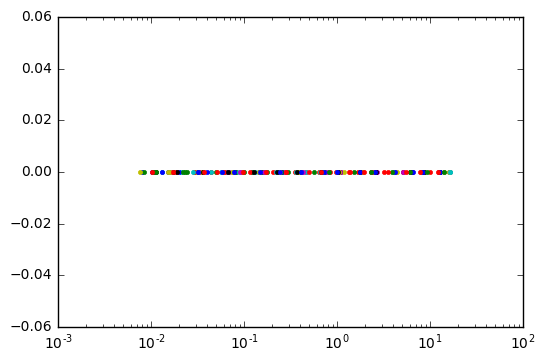

In [10]:
for i in range(len(wt_ligs)):
    plt.semilogx(wt_ligs[i], 0*wt_ligs[i],'.')

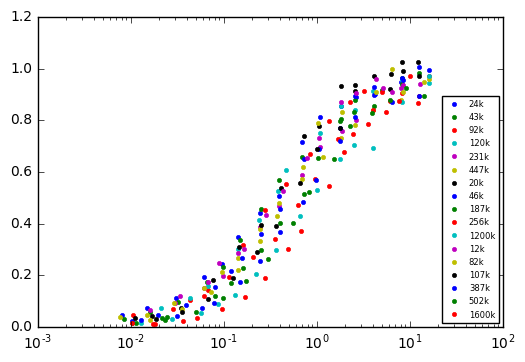

In [11]:
for i in range(len(wt_ligs)):
    plt.semilogx(wt_ligs[i], wt_sats[i],'.',label=keys[i])
    plt.legend(loc=4,prop={'size':6},numpoints=1)

In [12]:
#define an objective function for use with lmfit (must mesh with lmfit.Parameter class)
def wyman_obj_lmfit_mod1(parm,lig,data,rtot,eps=None):
    """maximizes vector ops"""
    k11 = parm['k11']
    k21 = parm['k21']
    k22 = parm['k22']
    l20 = parm['l20']
    
    ligc = np.concatenate(lig)
    datac = np.concatenate(data)
    
    rfree = (((-1 - k11*ligc)) + \
    (np.sqrt(np.concatenate((np.square((1 + k11*lig)) + \
    8.*l20*rtot*(1 + k21*lig + k21*k22*(np.square(lig)))))))) \
    / (4*l20*(1 + k21*ligc + k21*k22*(np.square(ligc))))    
       
    bfrac = (k11*ligc + l20*k21*rfree*ligc + \
    2*l20*k21*k22*rfree*(np.square(ligc))) \
    / (1 + 2*l20*rfree + k11*ligc + \
    2*l20*k21*rfree*ligc + 2*l20*k21*k22*rfree*(np.square(ligc)))
    
    residual = (bfrac - datac)
    
    if eps is None:
        return residual
    else:
        weights = 1/(np.concatenate(eps))
        return (residual*weights)

In [13]:
import lmfit

In [14]:
parms = lmfit.Parameters()

In [15]:
parms.add('k11', value=10., min=0., max=100.)
parms.add('k21', value=10., min=0., max=100.)
parms.add('k22', value=10., min=0., max=100.)
parms.add('l20', value=100., min=0., max=1000.)

In [16]:
wyman_obj_lmfit_mod1(parms,wt_ligs,wt_sats,wt_rtots)

array([ 0.02213806,  0.04913676,  0.11549398,  0.18092363,  0.24431849,
        0.2478965 ,  0.27690782,  0.30072522,  0.16626253,  0.10840002,
        0.09932107,  0.07620764,  0.07900778,  0.04291125, -0.00177434,
        0.03895379,  0.0687844 ,  0.13390754,  0.21678881,  0.2632347 ,
        0.2691604 ,  0.27310099,  0.24442968,  0.22650177,  0.148775  ,
        0.09034157,  0.06593798,  0.02609997,  0.0392397 ,  0.18687686,
        0.24903132,  0.30894503,  0.29912944,  0.28685831,  0.23729613,
        0.14399013,  0.09521797,  0.06102913,  0.07414499,  0.0186023 ,
        0.02376825,  0.23654699,  0.1809256 ,  0.292289  ,  0.30247698,
        0.28140714,  0.22898622,  0.17516888,  0.09905506,  0.12950606,
        0.06788113,  0.03198743,  0.0505936 ,  0.08687663,  0.21363379,
        0.29756156,  0.31471185,  0.34910881,  0.35901332,  0.31118607,
        0.23852781,  0.20355916,  0.17262664,  0.06279111,  0.06605964,
        0.10661581,  0.01550755,  0.05459741,  0.09995461,  0.20

In [17]:
lmfit_min = lmfit.Minimizer(wyman_obj_lmfit_mod1,parms,fcn_args=(wt_ligs,wt_sats,wt_rtots))

In [18]:
lmfit_res = lmfit_min.minimize()

In [19]:
lmfit.report_fit(lmfit_res)

[[Fit Statistics]]
    # function evals   = 72
    # data points      = 239
    # variables        = 4
    chi-square         = 0.311
    reduced chi-square = 0.001
    Akaike info crit   = -1579.848
    Bayesian info crit = -1565.942
[[Variables]]
    k11:   3.74740064 +/- 0.263948 (7.04%) (init= 10)
    k21:   1.81367619 +/- 0.189873 (10.47%) (init= 10)
    k22:   0.11553982 +/- 0.051927 (44.94%) (init= 10)
    l20:   283.385877 +/- 90.17501 (31.82%) (init= 100)
[[Correlations]] (unreported correlations are <  0.100)
    C(k11, l20)                  =  0.954 
    C(k22, l20)                  =  0.768 
    C(k11, k22)                  =  0.622 
    C(k21, k22)                  =  0.439 
    C(k21, l20)                  =  0.395 
    C(k11, k21)                  =  0.303 


In [20]:
err = 0.01*wt_sats

In [21]:
lmfit_min_wts = lmfit.Minimizer(wyman_obj_lmfit_mod1,parms,fcn_args=(wt_ligs,wt_sats,wt_rtots,err))

In [22]:
lmfit_res_wts = lmfit_min_wts.minimize(method='least_squares')

In [23]:
lmfit.report_fit(lmfit_res_wts)

[[Fit Statistics]]
    # function evals   = 17
    # data points      = 239
    # variables        = 4
    chi-square         = 85811.742
    reduced chi-square = 365.156
    Akaike info crit   = 1414.144
    Bayesian info crit = 1428.050
[[Variables]]
    k11:   3.69122286 (init= 10)
    k21:   0.71123514 (init= 10)
    k22:   0.01637192 (init= 10)
    l20:   211.580611 (init= 100)
[[Correlations]] (unreported correlations are <  0.100)


In [24]:
#define an objective function for use with scipy optimize (obviates parameter class)
#eps is standard deviation
def wyman_rtotfinder(rtot,lig,data,parm,eps=None):
    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]
    
    ligc = np.concatenate(lig)
    datac = np.concatenate(data)
    
    rfree = (((-1 - k11*ligc)) + \
    (np.sqrt(np.concatenate((np.square((1 + k11*lig)) + \
    8.*l20*rtot*(1 + k21*lig + k21*k22*(np.square(lig)))))))) \
    / (4*l20*(1 + k21*ligc + k21*k22*(np.square(ligc))))    
       
    bfrac = (k11*ligc + l20*k21*rfree*ligc + \
    2*l20*k21*k22*rfree*(np.square(ligc))) \
    / (1 + 2*l20*rfree + k11*ligc + \
    2*l20*k21*rfree*ligc + 2*l20*k21*k22*rfree*(np.square(ligc)))
    
    residual = (bfrac - datac)

    if eps is None:
        return residual
    else:
        weights = 1/(np.concatenate(eps))
        return (residual*weights)

In [25]:
wt_rtots.size

17

In [26]:
from scipy import optimize

In [27]:
parmvec  = np.array([4.53370698e+00,2.30981862e+00,2.96309686e-01,9.71766880e+02])

In [28]:
bounds=((0.,0.,0.,0.),(100.,100.,100.,1000.))

In [29]:
low = tuple([0.for i in range(17)])

In [30]:
hi = tuple([1. for i in range(17)])

In [31]:
a = (1.0,
     1.0)

In [32]:
b = (1.0, 1.0)

In [33]:
a == b

True

In [34]:
bounds = (low,hi)

In [35]:
res_lsq_bounds = optimize.least_squares(wyman_rtotfinder,wt_rtots,bounds=bounds,args=(wt_ligs,wt_sats,parmvec))

In [36]:
res_lsq_bounds.x

array([  6.16491203e-04,   8.67594149e-04,   1.54952337e-03,
         1.11590134e-03,   3.78495491e-03,   6.07879774e-03,
         7.77234686e-04,   3.27806192e-03,   9.06032444e-03,
         2.02117892e-02,   2.10200813e-01,   1.47772525e-03,
         2.92835339e-03,   4.66320679e-03,   1.93163523e-02,
         3.80381173e-02,   9.90743823e-01])

In [37]:
wt_rtots

array([ 0.001439 ,  0.002422 ,  0.003392 ,  0.002718 ,  0.01216  ,
        0.02594  ,  0.0005889,  0.002544 ,  0.00643  ,  0.01263  ,
        0.05509  ,  0.001193 ,  0.003513 ,  0.006083 ,  0.01968  ,
        0.03013  ,  0.0925   ])

In [38]:
res_lsq_bounds.x / wt_rtots

array([  0.4284164 ,   0.35821393,   0.45681703,   0.41055973,
         0.31126274,   0.2343407 ,   1.31980758,   1.28854635,
         1.40907068,   1.60030002,   3.81558928,   1.23866325,
         0.83357626,   0.76659655,   0.98152197,   1.26246656,  10.71074403])

In [39]:
pike08_wt_ligs = wt_ligs[0:6]

In [40]:
pike08_wt_sats = wt_sats[0:6]

In [41]:
pike08_wt_sats.size

6

In [42]:
pike_08_rtots = wt_rtots[0:6]

In [43]:
pike08_wt_ligs

array([ array([  7.96945700e-03,   1.49932600e-02,   3.09951900e-02,
         6.10952800e-02,   9.51486100e-02,   1.43964800e-01,
         2.43969000e-01,   3.94505100e-01,   6.86923000e-01,
         1.07939900e+00,   1.84758300e+00,   2.61864500e+00,
         4.19711500e+00,   8.12129800e+00,   1.60132400e+01]),
       array([ 0.00843508,  0.01632461,  0.03219274,  0.06589953,  0.09789267,
        0.1495181 ,  0.2533132 ,  0.3979881 ,  0.6938425 ,  1.831155  ,
        2.570049  ,  5.068029  ,  8.196809  ]),
       array([  1.04782800e-02,   4.39510000e-02,   6.71754600e-02,
         1.59764000e-01,   2.75784200e-01,   4.67317900e-01,
         8.37884700e-01,   1.34129100e+00,   2.29507100e+00,
         3.22207200e+00,   5.06843800e+00,   9.99232400e+00,
         1.63226300e+01]),
       array([  0.06716596,   0.04394744,   0.142679  ,   0.237226  ,
         0.3870431 ,   0.4670442 ,   1.080119  ,   1.830193  ,
         2.595465  ,   4.079464  ,   8.197306  ,  16.17389   ,   0.02105896

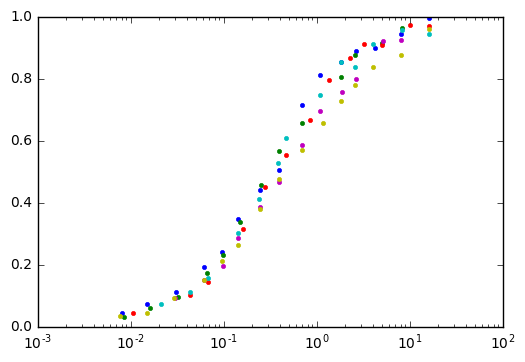

In [44]:
for i in range(len(pike08_wt_ligs)):
    plt.semilogx(pike08_wt_ligs[i],pike08_wt_sats[i],'.')

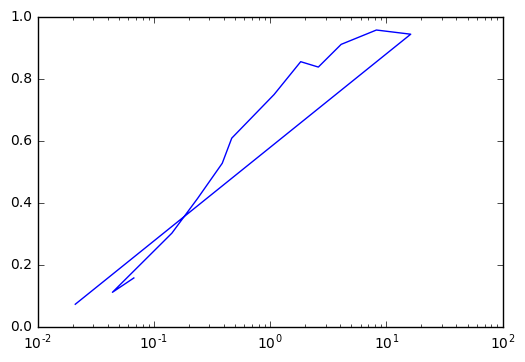

In [45]:
    plt.semilogx(pike08_wt_ligs[3],pike08_wt_sats[3])

In [46]:
a = pike08_wt_ligs[3].sort()

In [47]:
pike08_wt_ligs[3]

array([  0.02105896,   0.04394744,   0.06716596,   0.142679  ,
         0.237226  ,   0.3870431 ,   0.4670442 ,   1.080119  ,
         1.830193  ,   2.595465  ,   4.079464  ,   8.197306  ,  16.17389   ])

In [51]:
for i in range(len(pike08_wt_ligs)):
    print(pike08_wt_ligs[i].size)

15
13
13
13
12
15


In [52]:
for i in range(len(pike08_wt_sats)):
    print(pike08_wt_sats[i].size)

15
13
13
13
12
15


In [53]:
ar1 = pike08_wt_ligs[0]
ar2 = pike08_wt_ligs[1]
def closest(ar1, ar2, iter):
    x = np.abs(ar1[iter] - ar2)
    index = np.where(x==x.min())
    value = ar2[index]
    return value

In [54]:
ar1

array([  7.96945700e-03,   1.49932600e-02,   3.09951900e-02,
         6.10952800e-02,   9.51486100e-02,   1.43964800e-01,
         2.43969000e-01,   3.94505100e-01,   6.86923000e-01,
         1.07939900e+00,   1.84758300e+00,   2.61864500e+00,
         4.19711500e+00,   8.12129800e+00,   1.60132400e+01])

In [56]:
ar2

array([ 0.00843508,  0.01632461,  0.03219274,  0.06589953,  0.09789267,
        0.1495181 ,  0.2533132 ,  0.3979881 ,  0.6938425 ,  1.831155  ,
        2.570049  ,  5.068029  ,  8.196809  ])

In [57]:
def find(x):
    return closest(ar1, ar2, x)
c = np.array(map(find, range(ar1.shape[0])))

In [58]:
ar1.shape

(15,)

In [59]:
c

array(<map object at 0x110c3cfd0>, dtype=object)

In [68]:
for i in range(13):
    print(closest(ar2,ar1,i))

[ 0.00796946]
[ 0.01499326]
[ 0.03099519]
[ 0.06109528]
[ 0.09514861]
[ 0.1439648]
[ 0.243969]
[ 0.3945051]
[ 0.686923]
[ 1.847583]
[ 2.618645]
[ 4.197115]
[ 8.121298]


for i in range(ar1.size[0]):

In [73]:
for i in range(ar1.shape[0]):
    print(ar1[i])

0.007969457
0.01499326
0.03099519
0.06109528
0.09514861
0.1439648
0.243969
0.3945051
0.686923
1.079399
1.847583
2.618645
4.197115
8.121298
16.01324


In [74]:
for i in range(ar2.shape[0]):
    print(ar2[i])

0.008435078
0.01632461
0.03219274
0.06589953
0.09789267
0.1495181
0.2533132
0.3979881
0.6938425
1.831155
2.570049
5.068029
8.196809


In [131]:
def init_nanarr(shape):
    nanarr = np.empty(shape)
    nanarr[:] = np.NAN
    return nanarr

In [87]:
init_nanarr(4)

array([ nan,  nan,  nan,  nan])

(array([0]),)

array([ nan,  nan,  nan,  nan,  nan])

In [113]:
bleb = np.array([3,2,3,7,1,6])

In [103]:
bleb[np.where(bleb==bleb.min())}

SyntaxError: invalid syntax (<ipython-input-103-948570f7171d>, line 1)

In [100]:
bleb[1]

2

In [111]:
np.where(bleb==3)[0][0]

2

In [114]:
np.argmin(bleb)

4

In [115]:
ar1

array([  7.96945700e-03,   1.49932600e-02,   3.09951900e-02,
         6.10952800e-02,   9.51486100e-02,   1.43964800e-01,
         2.43969000e-01,   3.94505100e-01,   6.86923000e-01,
         1.07939900e+00,   1.84758300e+00,   2.61864500e+00,
         4.19711500e+00,   8.12129800e+00,   1.60132400e+01])

In [116]:
init_nanarr(ar1.shape)

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan])

In [124]:
def ligner(arr1, arr2):
    if arr1.shape > arr2.shape:
        new_arr = init_nanarr(arr1.shape)
    else:
        new_arr = init_nanarr(arr1.shape)
        
    return new_arr

In [119]:
ligner(ar1,ar2)

(15,)


In [120]:
ligner(ar2,ar1)

(15,)


In [123]:
[i for i in range(ar1.shape[0])]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [125]:
        
    for i in range(arr1.shape[0]):
        x = np.abs(ar1[iter] - ar2)

IndentationError: unexpected indent (<ipython-input-125-33238f57dbfc>, line 2)

In [132]:
ligner(ar1,ar2)

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan])

In [140]:
def indices(arr_long,arr_short):
    holder = []
    for i in range(arr_short.shape[0]):
        x = np.abs(arr_long - arr_short[i])
        holder.append(np.argmin(x))
    return holder
        
        

In [143]:
a = indices(ar1,ar2)

In [146]:
len(a)

13

In [147]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13]

In [148]:
b = ligner(ar1,ar2)

In [149]:
b

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan])

In [150]:
for i,j in a,len(a):
    b[i] = a[j]

ValueError: too many values to unpack (expected 2)

In [151]:
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13]

In [159]:
for i in range(len(a)):
    b[a[i]] = ar2[i]

In [160]:
b

array([ 0.00843508,  0.01632461,  0.03219274,  0.06589953,  0.09789267,
        0.1495181 ,  0.2533132 ,  0.3979881 ,  0.6938425 ,         nan,
        1.831155  ,  2.570049  ,  5.068029  ,  8.196809  ,         nan])

In [154]:
b

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan])

In [163]:
np.array([ar1,ar2])

array([ array([  7.96945700e-03,   1.49932600e-02,   3.09951900e-02,
         6.10952800e-02,   9.51486100e-02,   1.43964800e-01,
         2.43969000e-01,   3.94505100e-01,   6.86923000e-01,
         1.07939900e+00,   1.84758300e+00,   2.61864500e+00,
         4.19711500e+00,   8.12129800e+00,   1.60132400e+01]),
       array([ 0.00843508,  0.01632461,  0.03219274,  0.06589953,  0.09789267,
        0.1495181 ,  0.2533132 ,  0.3979881 ,  0.6938425 ,  1.831155  ,
        2.570049  ,  5.068029  ,  8.196809  ])], dtype=object)

In [164]:
def aligner(arr1, arr2):
    if arr1.shape > arr2.shape:
        arr_long = arr1
        arr_short = arr2
        aligned_arr = init_nanarr(arr1.shape)
    else:
        arr_long = arr2
        arr_short = arr1
        aligned_arr = init_nanarr(arr2.shape)
        
    indices = []
    
    for i in range(arr_short.shape[0]):
        x = np.abs(arr_long - arr_short[i])
        indices.append(np.argmin(x))
        
    for i in range(len(indices)):
        aligned_arr[indices[i]] = arr_short[i]
        
    return np.array([arr_long,aligned_arr])

In [166]:
berb = aligner(ar1,ar2)

/Users/michael/miniconda3/envs/fitter/lib/python3.5/site-packages/matplotlib/scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


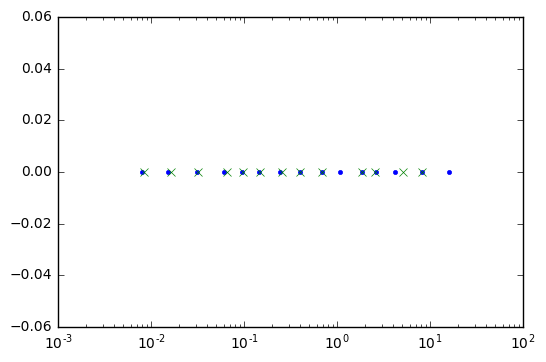

In [170]:
plt.semilogx(berb[0], 0*berb[0], '.')
plt.semilogx(berb[1],0*berb[1], 'x')